<a href="https://colab.research.google.com/github/Steven-A3/DeepLearningZeroToAllColab/blob/master/Lab02_Text_Classification(IMDB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb 리뷰 데이터를 통한 텍스트 분류
- [IMDb(Internet Movie Database):](https://www.imdb.com/) 영화, 배우, 텔레비전 드라마, 비디오 게임 등에 관한 정보를 제공하는 온라인 데이터베이스
- 50,000건의 리뷰 데이터를 활용하여 해당 리뷰가 긍정적(1)인지 부정적(0)인지 분류하는 순환신경망 모델 구축
![IMDb](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fo3XQA%2FbtqBuxuMwUY%2FQs6MBtLIWq9d1r2qj1z191%2Fimg.png)


## 01. 환경설정
### 텐서플로 2.x 설치 및 패키지 임포트

In [3]:
!pip install tensorflow==2.0.0 # "RESTART RUNTIME" 클릭 후 진행

     |████████████████████████████████| 86.3MB 73kB/s 
     |████████████████████████████████| 450kB 48.6MB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
print("Check tensorflow version:", tf.__version__)

Check tensorflow version: 2.0.0


## 02. 데이터
- IMDB 데이터 세트는 **`imdb.load_data()`** 함수를 통해 텐서플로에서 바로 불러올 수 있으며 훈련 세트 25,000개, 테스트 세트 25,000개로 구성되어 있습니다.

In [0]:
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=30, num_words=1000)

- **skip_top** 매개변수에는 가장 많이 등장한 단어들 중 건너뛸 단어의 개수를 지정할 수 있습니다.
<br>예를 들어, **"a", "is", "the"** 등과 같은 단어들은 영화 리뷰에 많이 등장하지만 분석에 유용하지 않으므로 건너뜁니다.
- **num_words** 매개변수는 훈련에 사용할 단어의 개수를 지정합니다.

#### 데이터 확인하기
- 훈련/시험 세트의 크기를 확인합니다.

In [5]:
print(x_train_all.shape, y_train_all.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


- 훈련 세트의 샘플을 확인합니다.
 - 이 정수들은 영단어를 고유한 정수에 일대일 대응한 것으로, **BoW(Bag-of-Words)** 혹은 어휘 사전이라고 부릅니다. 

In [6]:
print(x_train_all[0])

[2, 2, 2, 2, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 2, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 2, 546, 38, 2, 447, 2, 192, 50, 2, 2, 147, 2, 2, 2, 2, 2, 2, 2, 469, 2, 2, 71, 87, 2, 2, 43, 530, 38, 76, 2, 2, 2, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2, 2, 2, 480, 66, 2, 33, 2, 130, 2, 2, 38, 619, 2, 2, 124, 51, 36, 135, 48, 2, 2, 33, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 2, 400, 317, 46, 2, 2, 2, 2, 2, 104, 88, 2, 381, 2, 297, 98, 32, 2, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 30, 2, 2, 51, 36, 2, 224, 92, 2, 104, 2, 226, 65, 2, 38, 2, 88, 2, 2, 283, 2, 2, 2, 113, 103, 32, 2, 2, 2, 2, 178, 32]


- 숫자 0과 1은 각각 패딩과 글의 시작을 나타내는 데 사용합니다.
- 숫자 2는 어휘 사전에 없는 단어입니다. 훈련 세트에서 이 숫자들을 제외합니다.

In [10]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[43, 530, 973, 65, 458, 66, 173, 36, 256, 100, 43, 838, 112, 50, 670, 35, 480, 284, 150, 172, 112, 167, 336, 385, 39, 172, 546, 38, 447, 192, 50, 147, 469, 71, 87, 43, 530, 38, 76, 515, 626, 62, 386, 316, 106, 480, 66, 33, 130, 38, 619, 124, 51, 36, 135, 48, 33, 215, 77, 52, 407, 82, 107, 117, 256, 723, 36, 71, 43, 530, 476, 400, 317, 46, 104, 88, 381, 297, 98, 32, 56, 141, 194, 226, 134, 476, 480, 144, 30, 51, 36, 224, 92, 104, 226, 65, 38, 88, 283, 113, 103, 32, 178, 32]


- 훈련 세트의 타깃 데이터도 확인해 보겠습니다.
- 이진 분류 문제이므로 타깃 데이터는 1과 0으로 영화 리뷰가 긍정(1)인지 부정(0)인지를 나타냅니다.

In [11]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


#### 어휘 사전 내려받기
- 정수를 영단어로 바꾸려면 어휘 사전이 필요합니다. 어휘 사전은 **`get_word_index()`** 함수로 내려받을 수 있습니다.
- 이 함수는 영단어와 정수로 구성된 딕셔너리를 반환합니다.

In [12]:
word_to_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


- **`love`**라는 영단어는 116이라는 정수에 대응되어 있음을 알 수 있습니다.

In [13]:
word_to_index["love"]

116

In [15]:
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

#### 훈련 세트의 정수를 영단어로 변환하여 확인해보기
- 훈련 세트에 있는 정수는 3 이상부터 영단어를 의미하므로 3을 뺀 값을 어휘 사전의 인덱스로 사용해야 합니다.

In [16]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w-3], end=" ")

just brilliant casting story direction really part they played could just imagine being there robert an amazing actor now same being director father came from same myself so loved fact there real throughout were great just brilliant so much soon released would recommend everyone watch amazing really at end so sad know what they say if at must been good definitely also two little played paul they were just brilliant children often left out think because stars play them all up such big whole these children amazing should be what they done don't think whole story so because true life after all us all 

## 03. 전처리
### 샘플 길이 맞추기
- 훈련 세트의 입력 데이터는 리뷰 데이터이므로 각 샘플의 크기가 다릅니다.
- 샘플의 길이가 다르면 모델을 제대로 훈련시킬 수 없습니다.

In [17]:
print(len(x_train_all[0]), len(x_train_all[1]))

104 81


- 텐서플로를 활용하여 샘플의 길이를 맞추어줍니다.

In [18]:
from tensorflow.keras.preprocessing import sequence

maxlen = 1000
x_train_all_seq = sequence.pad_sequences(x_train_all, maxlen=maxlen)
print(x_train_all_seq.shape)

(25000, 1000)


In [19]:
x_train_all_seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### 검증 세트 준비하기
- 25,000개의 훈련 세트 중 5,000개만 분리하여 검증 세트로 사용하겠습니다.
- 넘파이의 **`permutation()`** 함수를 사용하여 25,000개의 인덱스를 섞은 후 앞의 20,000개는 훈련 세트로, 나머지는 검증 세트로 분리합니다.

In [0]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all_seq[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]

x_val = x_train_all_seq[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

## 04. 모델링
### 임베딩층으로 순환 신경망 모델 성능 높이기
- 컴퓨터가 자연어를 처리하기 위해서는 자연어를 수치적으로 변환해야 합니다.
- 단어 임베딩(Word embedding)이란 단어의 의미를 보존하면서 단어를 벡터화시키는 방법입니다.
- 즉, 단어 임베딩은 단어를 다음 그림처럼 고정된 길이의 실수 벡터로 임베딩합니다.<br>


![alt text](https://k.kakaocdn.net/dn/brIGGV/btqBuixRRYP/HBAxBchG2Y2T1hNtGsKlC1/img.png)

- 단어 임베딩은 모델을 훈련하면서 같이 훈련되므로 훈련이 진행될수록 단어의 연관 관계를 더 정확하게 찾을 수 있습니다.
- 텐서플로는 **`Embedding`** 클래스로 단어 임베딩을 제공합니다.

### **`SimpleRNN`** 클래스로 순환 신경망 만들기

#### 순환 신경망에 필요한 클래스 임포트하기
- 텐서플로에서 가장 기본적인 순환층은 **`SimpleRNN`** 클래스입니다.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

#### 모델 만들기
- **`Keras`**의 **`Sequential`** 클래스를 사용하여 순차적으로 층을 쌓는 신경망 모델 객체를 생성합니다.

In [0]:
model_rnn = Sequential()

- **`add()`** 메서드를 사용하여 층을 추가할 수 있습니다.
- **`Embedding`** 클래스를 사용하여 임베딩 층을 추가합니다. 임베딩 층은 모델의 가장 첫번째 층으로 지정해줘야합니다.
  - **`Embedding(1000, 32)`**은 1000개의 단어를 32차원의 벡터로 임베딩하는 임베딩 층이란 뜻입니다.


In [0]:
model_rnn.add(Embedding(1000, 32))

- **`SimpleRNN(8)`**: 셀의 개수가 8개인 순환층을 추가합니다.

In [0]:
model_rnn.add(SimpleRNN(8))

- 최종 분류를 위한 출력층을 추가합니다. 이진 분류 문제이므로 시그모이드 함수를 활성화 함수로 지정했습니다.

In [0]:
model_rnn.add(Dense(1, activation="sigmoid"))

- **`summary()`** 메서드를 사용하여 최종 모델을 확인합니다.

In [26]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 8)                 328       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일하고 훈련시키기
- **`Sequential`** 클래스의 **`compile()`** 메서드를 사용하여 최적화 알고리즘과 손실 함수를 지정합니다.
  - 최적화 알고리즘은 **`optimizer`** 매개변수를 사용합니다. 매개변수 값으로 **`"adam"`**을 지정하면 *`ADAptive Moment estimation`* 경사 하강법을 사용합니다. **`"sgd`"**를 지정하면 기본 경사 하강법을 사용합니다.

  - **`loss`** 매개변수를 통해 손실 함수를 지정합니다. 회귀문제의 경우 **`"mse"`**, 이진 분류 문제의 경우 **`binary_crossentropy`**, 다중 분류 문제의 경우 **`"categorical_crossentropy"`**로 지정합니다.

In [0]:
model_rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

- **`fit()`** 메서드를 사용하여 모델을 훈련시킵니다.

In [28]:
history = model_rnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 184s 9ms/sample - loss: 0.5178 - accuracy: 0.7503 - val_loss: 0.4660 - val_accuracy: 0.7914
Epoch 2/10
20000/20000 [==============================] - 166s 8ms/sample - loss: 0.4076 - accuracy: 0.8242 - val_loss: 0.4037 - val_accuracy: 0.8302
Epoch 3/10
20000/20000 [==============================] - 165s 8ms/sample - loss: 0.3368 - accuracy: 0.8625 - val_loss: 0.3899 - val_accuracy: 0.8380
Epoch 4/10
20000/20000 [==============================] - 163s 8ms/sample - loss: 0.3077 - accuracy: 0.8767 - val_loss: 0.4035 - val_accuracy: 0.8384
Epoch 5/10
20000/20000 [==============================] - 160s 8ms/sample - loss: 0.2779 - accuracy: 0.8913 - val_loss: 0.4258 - val_accuracy: 0.8312
Epoch 6/10
20000/20000 [==============================] - 160s 8ms/sample - loss: 0.2523 - accuracy: 0.9036 - val_loss: 0.4448 - val_accuracy: 0.8156
Epoch 7/10
20000/20000 [===========================

#### 정확도 그래프 그리기

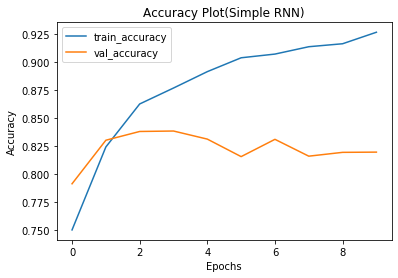

In [29]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train_accuracy", "val_accuracy"])
plt.title("Accuracy Plot(Simple RNN)")
plt.show()

#### 검증 세트 정확도 평가하기
- 모델을 검증 세트나 테스트 세트에서 평가할 때는 **`evaluate`** 메서드를 사용합니다.

In [30]:
loss, accuracy = model_rnn.evaluate(x_val, y_val, verbose=0)
print(accuracy)

0.8196


### LSTM 순환 신경망 만들기
- 순환 신경망을 만들 때 **`SimpleRNN`** 클래스를 사용했습니다.
- 이 클래스를 **`LSTM`** 클래스로 바꾸기만 하면 **`LSTM`** 순환 신경망을 만들 수 있습니다.

In [0]:
from tensorflow.keras.layers import LSTM

In [32]:
model_lstm = Sequential()
model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation="sigmoid"))
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [35]:
history = model_lstm.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 262s 13ms/sample - loss: 0.4461 - accuracy: 0.8026 - val_loss: 0.3824 - val_accuracy: 0.8408
Epoch 2/5
20000/20000 [==============================] - 264s 13ms/sample - loss: 0.3333 - accuracy: 0.8665 - val_loss: 0.3739 - val_accuracy: 0.8420
Epoch 3/5
20000/20000 [==============================] - 263s 13ms/sample - loss: 0.3041 - accuracy: 0.8745 - val_loss: 0.3390 - val_accuracy: 0.8520
Epoch 4/5
20000/20000 [==============================] - 264s 13ms/sample - loss: 0.2849 - accuracy: 0.8837 - val_loss: 0.3415 - val_accuracy: 0.8478
Epoch 5/5
20000/20000 [==============================] - 265s 13ms/sample - loss: 0.2693 - accuracy: 0.8906 - val_loss: 0.3425 - val_accuracy: 0.8522


#### 정확도 그래프 그리기

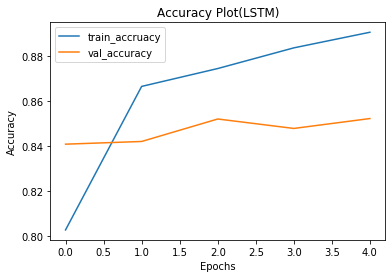

In [36]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train_accruacy", "val_accuracy"])
plt.title("Accuracy Plot(LSTM)")
plt.show()

#### 검증 세트 정확도 평가하기

In [37]:
loss, accuracy = model_lstm.evaluate(x_val, y_val, verbose=0)
print(accuracy)

0.8522


https://wikidocs.net/book/2155